In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/calories.csv')
df2 = pd.read_csv('data/exercise.csv')

df = df1.merge(df2, on=['User_ID'])

In [3]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


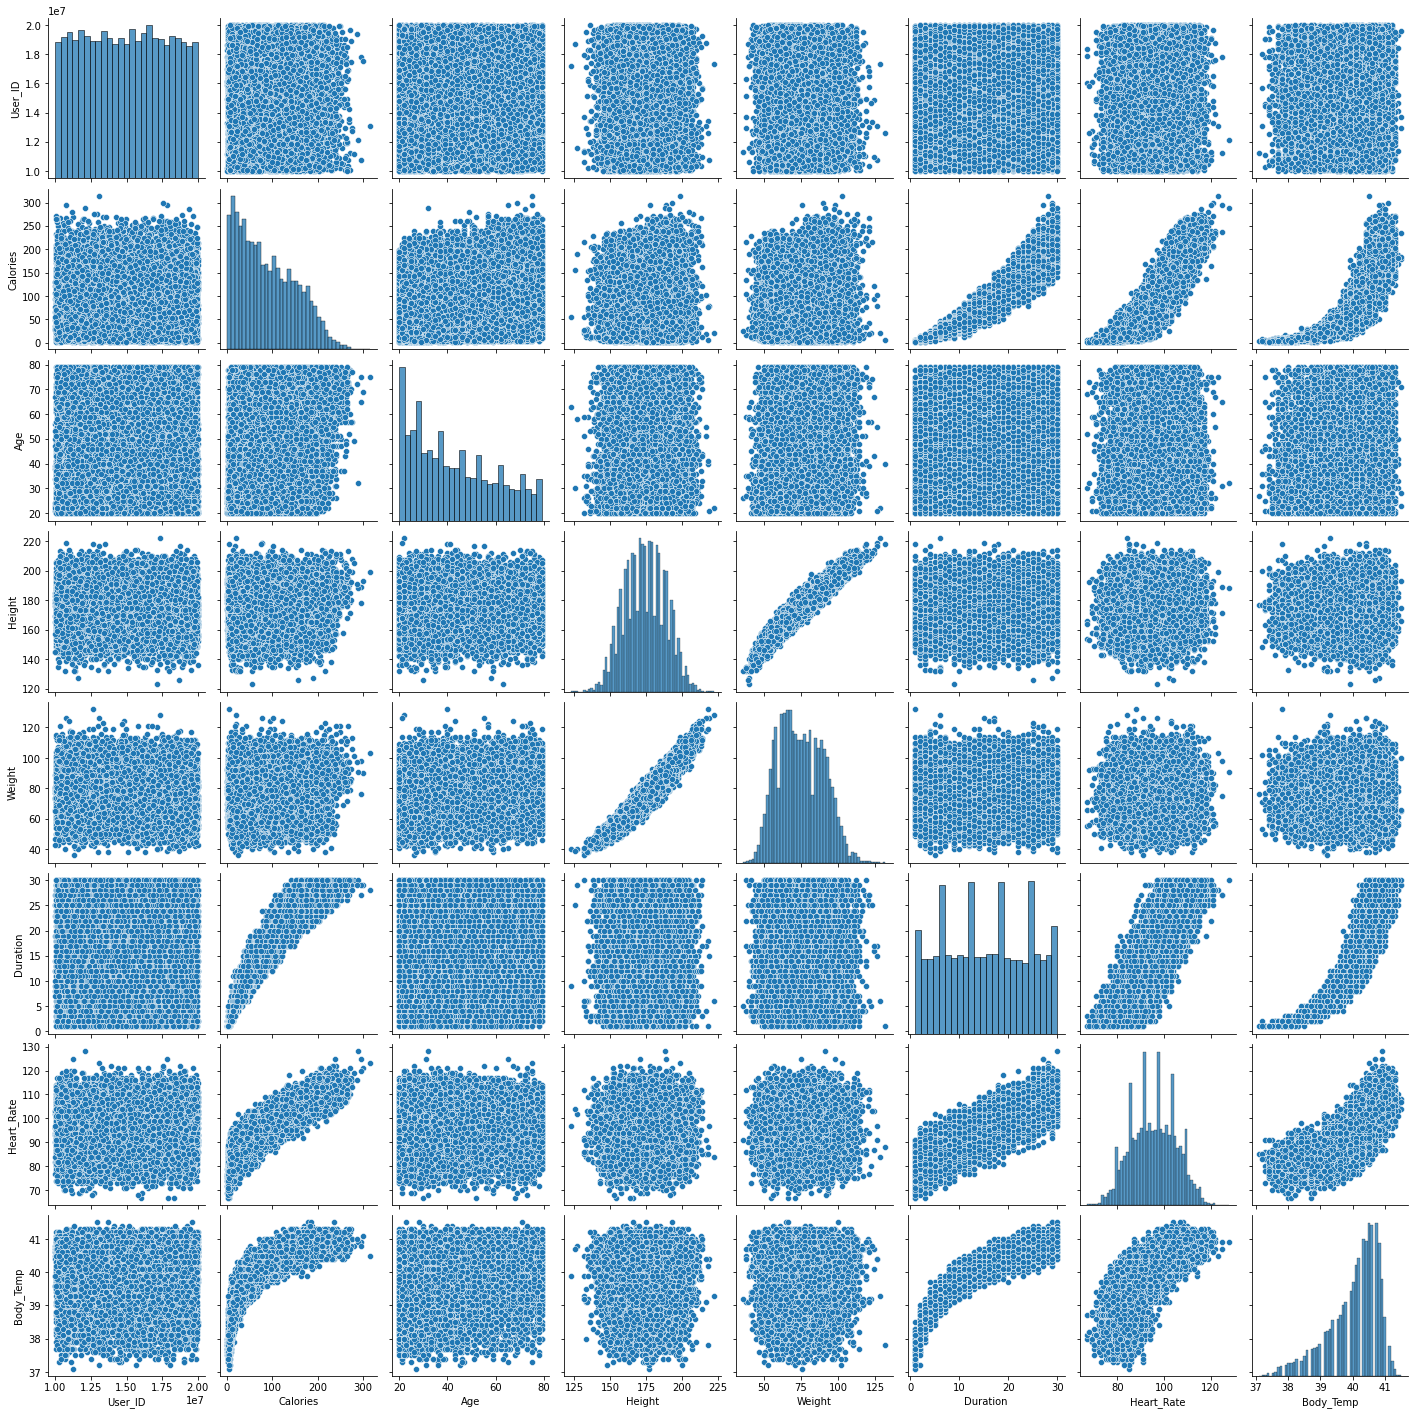

In [6]:
sns.pairplot(df, kind='scatter')
plt.show()

### From the pairplot, the most interesting things to look at are calories burned vs. weight, height, age, and duration of workout

## Will body temperates increase if calories burn increases?

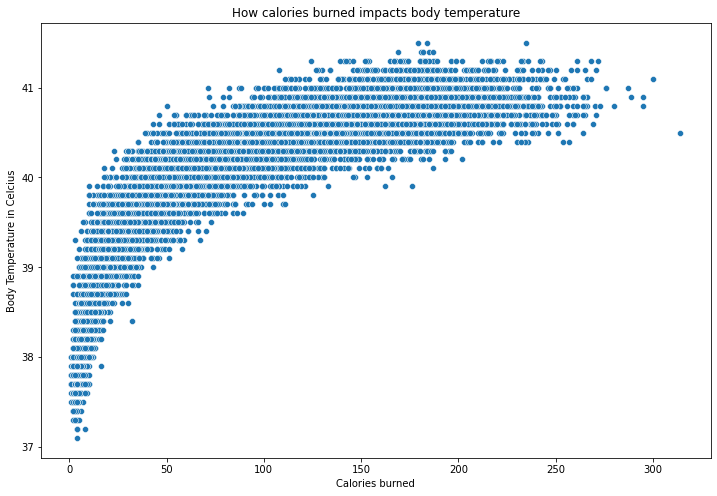

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Calories', y='Body_Temp')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.show()

### Does weight have an impact on the finding above?

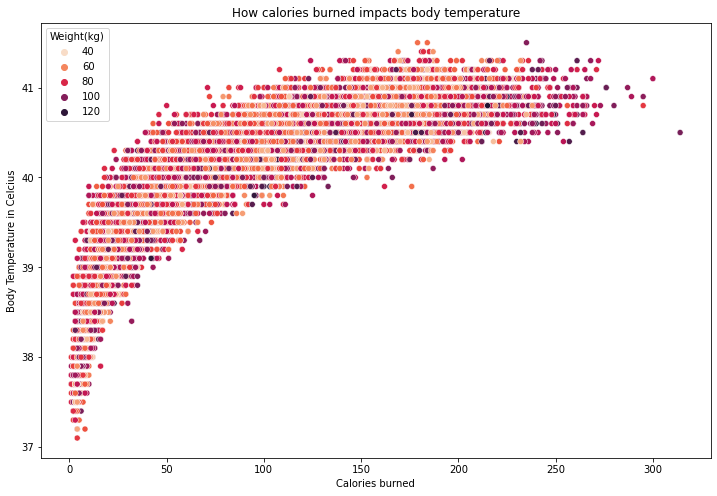

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Calories', y='Body_Temp', hue='Weight', palette='rocket_r')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.legend(title='Weight(kg)')
plt.show()

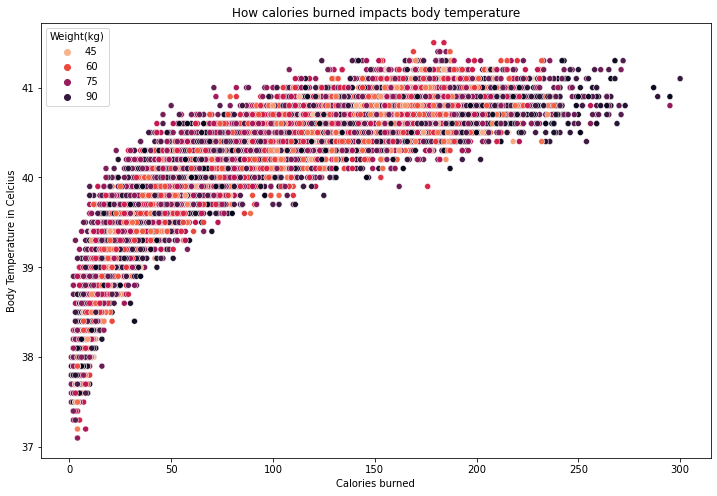

In [9]:
WEIGHT = df[df['Weight'] < 100]
plt.figure(figsize=(12,8))
sns.scatterplot(data=WEIGHT, x='Calories', y='Body_Temp', hue='Weight', palette='rocket_r')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.legend(title='Weight(kg)')
plt.show()

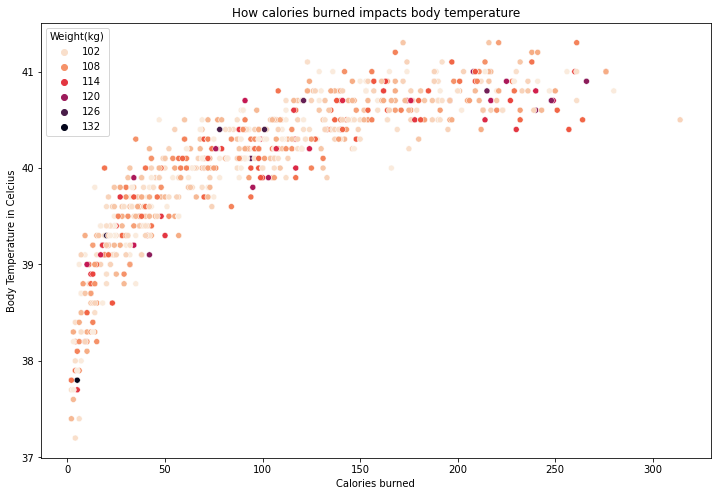

In [10]:
WEIGHT = df[df['Weight'] > 100]
plt.figure(figsize=(12,8))
sns.scatterplot(data=WEIGHT, x='Calories', y='Body_Temp', hue='Weight', palette='rocket_r')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.legend(title='Weight(kg)')
plt.show()

### The data for individuals over 100kg is much less than individuals below 100kg

### Does Age make a different in this impact?

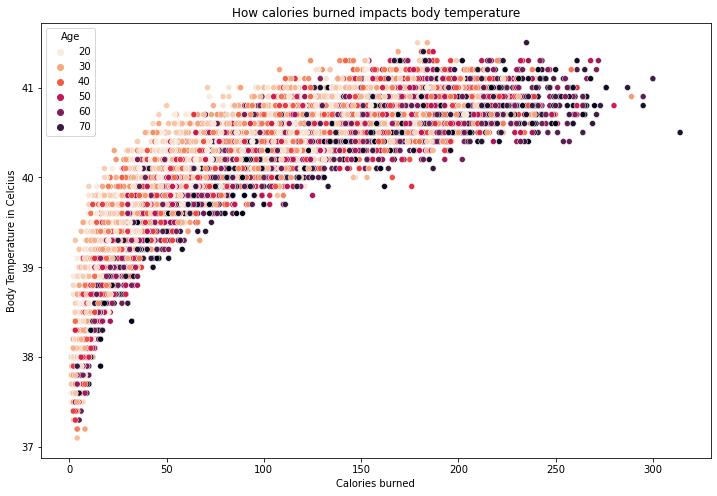

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Calories', y='Body_Temp', hue='Age', palette='rocket_r')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.show()

### How does time impact these metrics?

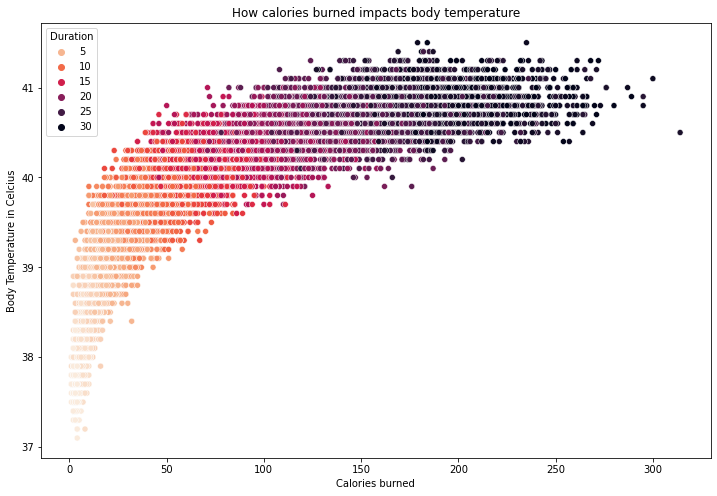

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Calories', y='Body_Temp', hue='Duration', palette='rocket_r')

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.show()

### Does Heart Rate increase as Calories are burned and body temp goes up?

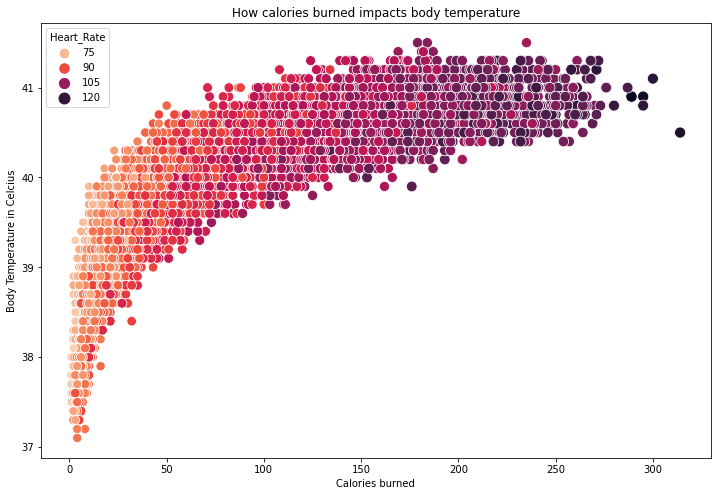

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Calories', y='Body_Temp', hue='Heart_Rate', palette='rocket_r', size='Heart_Rate', sizes=(67,128))

plt.xlabel('Calories burned')
plt.ylabel('Body Temperature in Celcius')
plt.title('How calories burned impacts body temperature')
plt.show()

In [14]:
print(df['Heart_Rate'].max())
print(df['Heart_Rate'].min())

128.0
67.0


## How does the distribution of calories burned look?

In [15]:
import random
random.seed(2021)


total_exercisers = len(df)
sample_size= int(total_exercisers * .05)

sample = df.sample(sample_size)


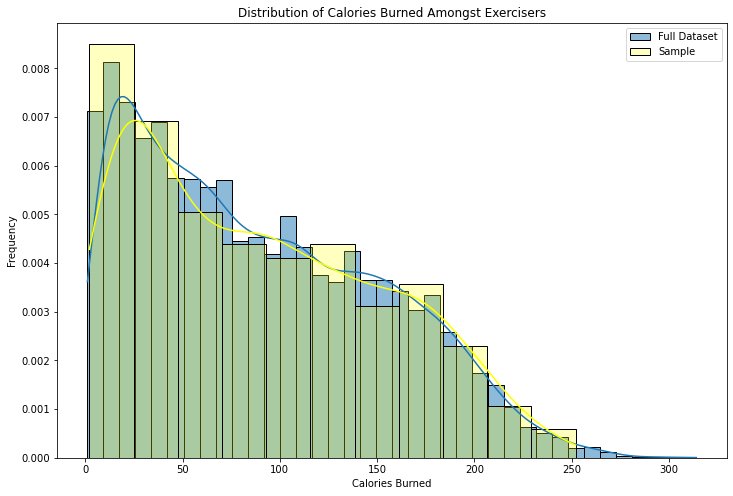

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data=df['Calories'], label='Full Dataset', stat='density', kde=True)
sns.histplot(data=sample['Calories'], label='Sample', stat='density', kde=True, color='yellow', alpha=.25)

plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Burned Amongst Exercisers')
plt.legend()
plt.show()

In [17]:
print("Full Dataset:")
print(df.describe())
print("*" * 20)
print("Sample:")
print(sample.describe())

Full Dataset:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.035657   
min    1.000116e+07      1.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07     35.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07     79.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07    138.000000     56.000000    185.000000     87.000000   
max    1.999965e+07    314.000000     79.000000    222.000000    132.000000   

           Duration    Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  15000.000000  
mean      15.530600     95.518533     40.025453  
std        8.319203      9.583328      0.779230  
min        1.000000     67.000000     37.100000  
25%        8.000000     

In [25]:
k = 5000 # number of samples
n = 50 # number of exercisers

sample_means = []

sample_means = [np.mean(df.sample(n=n))['Calories'] for x in range(k)]

np.mean(df.sample(n=n)['Calories'])

91.48

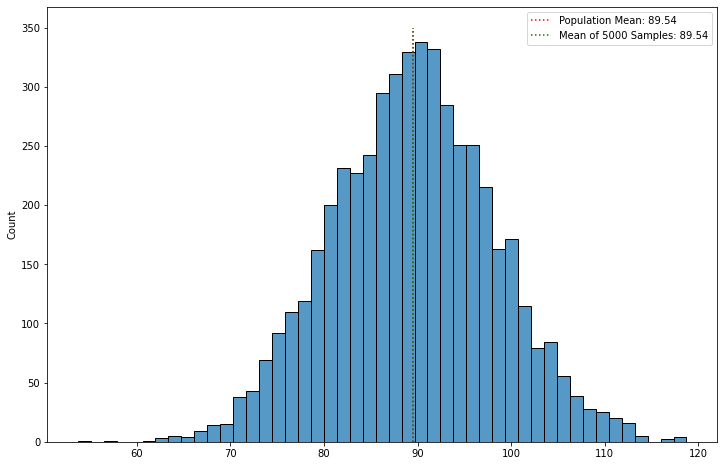

In [26]:
pop_mean = df['Calories'].mean()
samp_mean = np.mean(sample_means)

plt.figure(figsize=(12,8))

sns.histplot(sample_means)

plt.vlines(pop_mean, ymin=0, ymax=350, color='r', linestyle=':',
           label=f'Population Mean: {pop_mean:.2f}')
plt.vlines(samp_mean, ymin=0, ymax=350, color='g', linestyle=':',
           label=f'Mean of {k} Samples: {pop_mean:.2f}')

plt.legend()

plt.show()
